In [1]:
# If not already installed: 
%%capture
!pip install PyPortfolioOpt

UsageError: Line magic function `%%capture` not found.


In [2]:
import pandas as pd
import numpy as np
import glob
import sys

In [3]:
sys.path.insert(0, '../')
%load_ext autoreload
%autoreload 2

In [4]:
stock_paths = glob.glob('/workspaces/Stock-Trading/data/*csv')
stock_paths = [stock for stock in stock_paths if '^' not in stock]      # exclude indexes & ETFs 
stock_paths = [stock for stock in stock_paths if 'USD' not in stock]    # exclude crypto
stock_paths

['/workspaces/Stock-Trading/data/AAPL.csv',
 '/workspaces/Stock-Trading/data/ABNB.csv',
 '/workspaces/Stock-Trading/data/AMZN.csv',
 '/workspaces/Stock-Trading/data/AXON.csv',
 '/workspaces/Stock-Trading/data/BILL.csv',
 '/workspaces/Stock-Trading/data/BKNG.csv',
 '/workspaces/Stock-Trading/data/BNTX.csv',
 '/workspaces/Stock-Trading/data/COIN.csv',
 '/workspaces/Stock-Trading/data/COST.csv',
 '/workspaces/Stock-Trading/data/CRM.csv',
 '/workspaces/Stock-Trading/data/CRWD.csv',
 '/workspaces/Stock-Trading/data/DDOG.csv',
 '/workspaces/Stock-Trading/data/DOCN.csv',
 '/workspaces/Stock-Trading/data/DOCU.csv',
 '/workspaces/Stock-Trading/data/EA.csv',
 '/workspaces/Stock-Trading/data/FIVN.csv',
 '/workspaces/Stock-Trading/data/GMAB.csv',
 '/workspaces/Stock-Trading/data/GOOG.csv',
 '/workspaces/Stock-Trading/data/GRMN.csv',
 '/workspaces/Stock-Trading/data/HUBS.csv',
 '/workspaces/Stock-Trading/data/IDCC.csv',
 '/workspaces/Stock-Trading/data/MSFT.csv',
 '/workspaces/Stock-Trading/data/NE

In [5]:
all_stocks = []

for path in stock_paths:
    name = path.split("/")[-1].split(".")[0]
    stock = pd.read_csv(path)
    stock = stock[['Close']]
    stock.columns = [name]
    all_stocks.append(stock)

In [6]:
df = pd.concat(all_stocks, axis=1)
df


,AAPL,ABNB,AMZN,AXON,BILL,BKNG,BNTX,COIN,COST,CRM,...,SHOP,SNOW,SPLK,SPOT,TER,UBER,VMW,WDAY,XWD,ZM
0,24.714510,144.710007,308.519989,26.510000,35.500000,1142.060059,14.24,328.279999,119.534164,59.240002,...,17.000000,253.929993,58.790001,149.009995,18.604698,41.570000,55.923874,80.410004,32.676434,62.000000
1,24.018263,139.250000,302.190002,25.690001,38.980000,1097.579956,13.82,322.750000,118.175148,58.169998,...,25.680000,227.539993,56.840000,144.220001,18.255274,37.099998,55.215199,80.010002,31.961994,65.699997
2,24.020521,130.000000,295.290009,25.570000,36.380001,1079.959961,12.75,342.000000,119.736771,57.200001,...,28.309999,240.000000,55.779999,143.990005,17.698080,39.959999,53.688828,79.419998,31.881622,69.000000
3,24.357346,124.800003,298.420013,25.980000,37.000000,1069.569946,12.92,333.000000,121.821678,56.930000,...,29.650000,228.850006,56.250000,147.919998,17.839731,41.290001,53.729713,79.349998,32.140610,63.200001
4,25.293205,137.990005,300.459991,26.629999,38.040001,1082.849976,12.94,320.820007,122.868370,58.590000,...,27.500000,235.160004,58.450001,150.000000,18.396931,43.000000,54.363426,82.779999,32.730011,65.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,174.070007,NaN,3272.989990,138.149994,NaN,2261.989990,NaN,NaN,558.109985,213.979996,...,NaN,NaN,142.979996,NaN,122.690002,NaN,117.370003,241.229996,NaN,NaN
1820,174.720001,NaN,3295.469971,132.690002,NaN,2247.929932,NaN,NaN,555.710022,211.029999,...,NaN,NaN,142.509995,NaN,124.040001,NaN,118.370003,238.089996,NaN,NaN
1821,175.600006,NaN,3379.810059,135.110001,NaN,2276.820068,NaN,NaN,565.210022,215.279999,...,NaN,NaN,143.850006,NaN,122.959999,NaN,118.760002,244.229996,NaN,NaN
1822,178.960007,NaN,3386.300049,138.990005,NaN,2371.919922,NaN,NaN,569.979980,221.289993,...,NaN,NaN,143.470001,NaN,125.370003,NaN,119.230003,246.259995,NaN,NaN


## Calculate the efficient frontier

In [7]:
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

In [8]:
# mean historical return 
mu = expected_returns.mean_historical_return(df, frequency=252)
mu

AAPL    0.313570
ABNB    0.025505
AMZN    0.389139
AXON    0.257401
BILL    0.296388
BKNG    0.103455
BNTX    0.414275
COIN   -0.068353
COST    0.242948
CRM     0.195005
CRWD    0.206077
DDOG    0.210623
DOCN    0.048581
DOCU    0.148174
EA      0.149799
FIVN    0.557310
GMAB    0.283829
GOOG    0.264170
GRMN    0.163571
HUBS    0.455362
IDCC    0.046691
MSFT    0.324442
NET     0.306333
NFLX    0.324866
NVDA    0.749666
ORCL    0.108626
PYPL    0.175836
SAP     0.084285
SHOP    0.673699
SNOW   -0.012626
SPLK    0.129742
SPOT    0.006500
TER     0.295452
UBER   -0.017522
VMW     0.106367
WDAY    0.164223
XWD     0.110794
ZM      0.098570
dtype: float64

In [9]:
# volatility
sigma = risk_models.sample_cov(df, frequency=252)
sigma 

,AAPL,ABNB,AMZN,AXON,BILL,BKNG,BNTX,COIN,COST,CRM,...,SHOP,SNOW,SPLK,SPOT,TER,UBER,VMW,WDAY,XWD,ZM
AAPL,0.084462,0.001239,0.049647,0.047686,-0.000987,0.038859,0.003599,0.000912,0.028608,0.051384,...,-0.004316,0.001303,0.057819,0.002605,0.059870,-0.003484,0.037963,0.051771,0.001051,0.004380
ABNB,0.001239,0.057482,-0.000338,-0.001592,-0.001871,-0.000790,0.005410,0.001915,0.001335,0.003083,...,-0.006713,-0.009642,0.005773,0.000162,0.001029,0.005841,0.002083,0.005139,0.001227,0.002523
AMZN,0.049647,-0.000338,0.095520,0.042372,0.001885,0.037670,-0.004866,0.001156,0.025344,0.055615,...,-0.001198,-0.003188,0.060315,0.002621,0.046733,-0.001938,0.034838,0.057158,0.003313,0.004537
AXON,0.047686,-0.001592,0.042372,0.240577,-0.002522,0.049000,0.014391,-0.000678,0.022004,0.052839,...,-0.013900,-0.002613,0.072038,0.001594,0.067940,0.001115,0.045677,0.064627,0.006318,0.001252
BILL,-0.000987,-0.001871,0.001885,-0.002522,0.209216,-0.003924,0.020548,0.004148,-0.002512,-0.004366,...,0.008288,0.000542,-0.002802,0.004111,-0.003468,-0.005718,-0.001820,-0.004487,0.000733,0.000165
BKNG,0.038859,-0.000790,0.037670,0.049000,-0.003924,0.106221,0.002036,0.001747,0.017919,0.045321,...,0.000708,-0.002318,0.054328,0.001139,0.053797,0.000765,0.037713,0.049008,0.001367,0.005572
BNTX,0.003599,0.005410,-0.004866,0.014391,0.020548,0.002036,0.409753,-0.003208,-0.001658,-0.003202,...,-0.002413,-0.003205,0.001493,-0.012258,-0.002858,0.003314,-0.000204,0.003799,-0.003548,0.007411
COIN,0.000912,0.001915,0.001156,-0.000678,0.004148,0.001747,-0.003208,0.054656,0.001736,0.001100,...,-0.000668,0.007197,0.001492,-0.002845,0.000905,0.006340,-0.002760,-0.000428,0.001403,0.005408
COST,0.028608,0.001335,0.025344,0.022004,-0.002512,0.017919,-0.001658,0.001736,0.042608,0.025497,...,0.001048,-0.002134,0.027070,-0.000384,0.027905,0.002638,0.019085,0.023039,-0.000149,0.000771
CRM,0.051384,0.003083,0.055615,0.052839,-0.004366,0.045321,-0.003202,0.001100,0.025497,0.114808,...,-0.004574,-0.001376,0.090803,0.003315,0.057956,0.000149,0.046621,0.084897,0.003203,0.006891


In [10]:
ef = EfficientFrontier(mu, sigma)

/usr/local/lib/python3.8/site-packages/cvxpy/problems/problem.py:1333: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<AxesSubplot:xlabel='Volatility', ylabel='Return'>

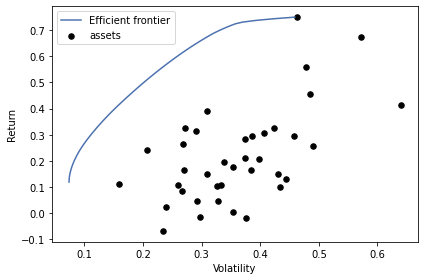

In [11]:
plotting.plot_efficient_frontier(ef, show_assets=True)

In [12]:
ef.tickers

['AAPL',
 'ABNB',
 'AMZN',
 'AXON',
 'BILL',
 'BKNG',
 'BNTX',
 'COIN',
 'COST',
 'CRM',
 'CRWD',
 'DDOG',
 'DOCN',
 'DOCU',
 'EA',
 'FIVN',
 'GMAB',
 'GOOG',
 'GRMN',
 'HUBS',
 'IDCC',
 'MSFT',
 'NET',
 'NFLX',
 'NVDA',
 'ORCL',
 'PYPL',
 'SAP',
 'SHOP',
 'SNOW',
 'SPLK',
 'SPOT',
 'TER',
 'UBER',
 'VMW',
 'WDAY',
 'XWD',
 'ZM']

In [13]:
ef.expected_returns

array([ 0.31357035,  0.0255053 ,  0.38913944,  0.25740058,  0.29638841,
        0.10345492,  0.4142753 , -0.06835321,  0.24294797,  0.19500492,
        0.20607699,  0.21062252,  0.04858118,  0.14817425,  0.14979907,
        0.55731007,  0.28382898,  0.26416993,  0.16357083,  0.45536189,
        0.04669094,  0.32444159,  0.30633269,  0.3248661 ,  0.74966645,
        0.10862561,  0.17583599,  0.08428495,  0.67369859, -0.01262569,
        0.12974244,  0.00649974,  0.2954521 , -0.0175216 ,  0.10636666,
        0.16422332,  0.11079383,  0.09857043])

In [14]:
# calculate volatility (volatility == std) 
stock_volatility = np.diagonal(ef.cov_matrix) ** 1/2
stock_volatility


array([0.04223106, 0.0287412 , 0.0477602 , 0.12028845, 0.10460813,
       0.05311035, 0.20487643, 0.02732793, 0.02130418, 0.05740401,
       0.07905202, 0.07026502, 0.04274218, 0.09232859, 0.04779614,
       0.11411631, 0.06968516, 0.03597774, 0.03656939, 0.11743633,
       0.05375666, 0.03692293, 0.08248347, 0.08977433, 0.10726729,
       0.03371689, 0.06251926, 0.03544415, 0.16390263, 0.04424845,
       0.0989276 , 0.06244619, 0.07459664, 0.0706085 , 0.05526612,
       0.07401012, 0.01262529, 0.09393406])

# Calculate Portfolio Performances

In [29]:
ef = EfficientFrontier(mu, sigma) # re-init to prevent error
weights = ef.max_sharpe()
weights

OrderedDict([('AAPL', 0.0),
             ('ABNB', 0.0120942216375284),
             ('AMZN', 0.0370913154617163),
             ('AXON', 0.0),
             ('BILL', 0.0545017732422478),
             ('BKNG', 0.0),
             ('BNTX', 0.0422100371060883),
             ('COIN', 0.0),
             ('COST', 0.1216491212713229),
             ('CRM', 0.0),
             ('CRWD', 0.037408164538943),
             ('DDOG', 0.0719947926315928),
             ('DOCN', 0.0224652418347037),
             ('DOCU', 0.0320193359903319),
             ('EA', 0.0),
             ('FIVN', 0.055728183803018),
             ('GMAB', 0.0068532296385279),
             ('GOOG', 0.0),
             ('GRMN', 0.0),
             ('HUBS', 0.0),
             ('IDCC', 0.0),
             ('MSFT', 0.0),
             ('NET', 0.0715212178444529),
             ('NFLX', 0.0),
             ('NVDA', 0.1069278242234342),
             ('ORCL', 0.0),
             ('PYPL', 0.0587621714891472),
             ('SAP', 0.0),
             

In [30]:
ef.portfolio_performance(verbose=True)

Expected annual return: 33.7%
Annual volatility: 12.6%
Sharpe Ratio: 2.53


(0.3374135556582107, 0.12557936196250039, 2.5275933138838087)

In [31]:
ef = EfficientFrontier(mu, sigma)  # re-init to prevent error
weights = ef.min_volatility()
weights

OrderedDict([('AAPL', 0.0),
             ('ABNB', 0.0929116055370877),
             ('AMZN', 0.0),
             ('AXON', 0.0),
             ('BILL', 0.0227946161682744),
             ('BKNG', 0.0065439397957388),
             ('BNTX', 0.0142233135844994),
             ('COIN', 0.0735899885651242),
             ('COST', 0.0849724775131644),
             ('CRM', 0.0),
             ('CRWD', 0.032108107932243),
             ('DDOG', 0.0427389486782636),
             ('DOCN', 0.0574737838923496),
             ('DOCU', 0.0202403029629823),
             ('EA', 0.0158389621085237),
             ('FIVN', 0.0008919340968717),
             ('GMAB', 0.0016388864898621),
             ('GOOG', 0.0),
             ('GRMN', 0.0248531894830798),
             ('HUBS', 0.0),
             ('IDCC', 0.0023859843490308),
             ('MSFT', 0.0),
             ('NET', 0.0290658777241811),
             ('NFLX', 0.0),
             ('NVDA', 0.0),
             ('ORCL', 0.0254215473211327),
             ('PYPL', 

In [32]:
ef.portfolio_performance(verbose=True)

Expected annual return: 11.9%
Annual volatility: 7.4%
Sharpe Ratio: 1.34


(0.1191941399633809, 0.07409155001099431, 1.3388050317298215)